In [26]:
import numpy as np
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

In [29]:
# Inlezen tok bestand
with open('blabla.tok', 'r') as f:
    lines = f.readlines()

tokenized_data = []
for line in lines:
    line = line.strip()
    if line:
        tokens = list(map(int, line.split()))
        tokenized_data.append(tokens)
print("tokenized_data: ", tokenized_data)

# Inlezen enc bestand (token ID -> token inhoud)
enc = {}
with open('resources/blabla.enc', 'r') as f:  # jouw enc bestand
    for line in f:
        line = line.strip()
        if line:
            tok_id, char = line.split(':', 1) #op de eerste : splitten indien ':' een token is uit de tekst
            enc[int(tok_id)] = char
print("enc:", enc)

tokenized_data:  [[1, 2], [3, 4, 5, 6, 5, 7, 7, 4], [8, 9, 10, 11, 9, 12, 12, 9, 4], [13, 5, 14, 15, 3, 2, 9, 4, 16, 17], [18, 3, 9, 11, 9, 12], [19, 9, 5], [11, 3, 3, 2, 20], [21, 5, 14, 15, 3, 2, 21], [22, 3, 3, 2], [23, 7, 5, 24, 25, 4, 5, 9, 4], [22, 7, 7, 26], [9, 9, 4], [7, 4, 8, 6, 5, 24, 8, 9], [27, 24, 28, 26, 12, 7, 4, 26], [19, 9, 9, 29, 5], [27, 9, 5, 9, 26, 9, 4, 5], [19, 9, 5], [4, 24, 9, 5], [15, 9, 9, 2], [3, 29], [15, 24, 4, 20, 9, 2], [20, 7, 4], [21, 10, 11, 9, 12, 12, 24, 4, 8, 21, 17], [1, 9, 4], [5, 14, 15, 3, 2], [26, 7, 4], [10, 3, 11, 9, 12], [8, 3, 9, 20, 30], [7, 12, 6], [26, 11, 7, 7, 20, 7, 7, 2, 20, 24, 8], [10, 24, 28, 4, 17], [1, 9, 4], [8, 3, 9, 20, 7, 7, 2, 20, 24, 8, 9], [5, 14, 15, 3, 2], [11, 3, 2, 20, 5], [3, 3, 26], [11, 9, 12], [27, 9, 4, 24, 8, 4, 9], [8, 9, 4, 3, 9, 15, 20, 31], [9, 9, 4], [26, 11, 7, 7, 20, 7, 7, 2, 20, 24, 8, 9], [15, 7, 12, 24, 8, 4, 9, 17], [32, 24, 28], [26, 7, 4, 26, 9, 2], [24, 6], [9, 2], [6, 23, 2, 7, 26, 9], [22, 7, 4

In [30]:
all_tokens = list(enc.values())
token_to_idx = {tok: i for i, tok in enumerate(all_tokens)}
idx_to_token = {i: tok for tok, i in token_to_idx.items()}
vocab_size = len(all_tokens)
print("Vocab size:", vocab_size)
print("Tokens:", all_tokens)
print("token_to_idx:", token_to_idx)
print("idx_to_token:", idx_to_token)

Vocab size: 41
Tokens: ['E', 'r', 'o', 'n', 't', 's', 'a', 'g', 'e', 'z', 'w', 'l', '(', 'u', 'm', ')', '.', 'H', 'h', 'd', "'", 'v', 'p', 'i', 'Ã«', 'k', 'b', 'j', 'f', '-', ',', 'B', 'K', 'c', 'y', 'D', ';', 'A', ':', '/', 'x']
token_to_idx: {'E': 0, 'r': 1, 'o': 2, 'n': 3, 't': 4, 's': 5, 'a': 6, 'g': 7, 'e': 8, 'z': 9, 'w': 10, 'l': 11, '(': 12, 'u': 13, 'm': 14, ')': 15, '.': 16, 'H': 17, 'h': 18, 'd': 19, "'": 20, 'v': 21, 'p': 22, 'i': 23, 'Ã«': 24, 'k': 25, 'b': 26, 'j': 27, 'f': 28, '-': 29, ',': 30, 'B': 31, 'K': 32, 'c': 33, 'y': 34, 'D': 35, ';': 36, 'A': 37, ':': 38, '/': 39, 'x': 40}
idx_to_token: {0: 'E', 1: 'r', 2: 'o', 3: 'n', 4: 't', 5: 's', 6: 'a', 7: 'g', 8: 'e', 9: 'z', 10: 'w', 11: 'l', 12: '(', 13: 'u', 14: 'm', 15: ')', 16: '.', 17: 'H', 18: 'h', 19: 'd', 20: "'", 21: 'v', 22: 'p', 23: 'i', 24: 'Ã«', 25: 'k', 26: 'b', 27: 'j', 28: 'f', 29: '-', 30: ',', 31: 'B', 32: 'K', 33: 'c', 34: 'y', 35: 'D', 36: ';', 37: 'A', 38: ':', 39: '/', 40: 'x'}


In [34]:
#Multi-hot input vectors maken
n = 1  # context grootte aan beide kanten moet nog veranderd kunnen worden door user
X, Y = [], []

# te kort voor 2n+1 dan slaan we deze over voor deze n=1 moet het minstens 3 tokens zijn
for token_sequence in tokenized_data:
    if len(token_sequence) < 2*n + 1:
        continue
    #loop over elk middelste token van 2n-1 gram
    for i in range(n, len(token_sequence) - n):
        context_ids = token_sequence[i - n:i] + token_sequence[i + 1:i + n + 1]  # token links en token rechts behalve doel token: midden

        #maak vector met aantal verschillende tokens als lengte
        num_tokens = len(all_tokens)
        x_vec = np.zeros(num_tokens)
        # voor token in context index word 1 zodat er multi hot ontstaat
        for t_id in context_ids:
            char = enc[t_id]
            x_vec[token_to_idx[char]] = 1  # multi-hot
        X.append(x_vec)

        #middelste token wat we willen voorspellen
        target_id = token_sequence[i]
        y_label = target_id - 1  # -1 omdat token IDs 1-based zijn
        Y.append(y_label)

X = np.array(X)
Y = np.array(Y)

print("X shape:", X.shape)  # (num_samples, token_size)
print("Y shape:", Y.shape)  # (num_samples,)

X shape: (843, 41)
Y shape: (843,)


Embedding van 'E': [ 3.72240782e-01 -1.06944080e+00  9.40042148e-01  4.38389252e-01
 -6.71956687e-01  7.61737293e-02  9.77027557e-02 -5.33770332e-02
 -3.70930468e-01  2.50211342e-01 -7.00112037e-01 -1.53142474e+00
  3.34556805e-01  6.66979104e-01 -5.09634487e-01  7.74237284e-01
 -8.48903754e-02 -2.61601188e-01 -1.31534046e+00  1.64003047e-03
  1.11946628e+00 -1.01082790e+00 -7.02199311e-01  7.18599087e-01
 -2.42591443e-02 -1.25082869e+00 -4.43148188e-01  4.27763969e-01
  3.69386804e-01  7.32283166e-01 -4.08072752e-01 -6.25258476e-01
 -4.72560511e-01 -1.76762745e-01  2.20538709e-01  9.92180374e-23
 -4.66448308e-01 -5.60604912e-01 -1.21990397e-01 -3.93012665e-01
 -3.18783572e-01]
Embedding van 'r': [ 5.05432312e-01 -7.23019584e-01  5.37045626e-01  2.66177682e-01
  5.56783724e-01  6.94476248e-01  8.81053995e-01 -1.06807175e+00
 -3.79314363e-01 -1.24975929e-02 -1.42458002e+00 -1.35662984e+00
 -5.14043103e-01  7.61628788e-01 -1.07930660e+00  1.74892954e-01
  4.66121510e-01  1.06374117e-01  

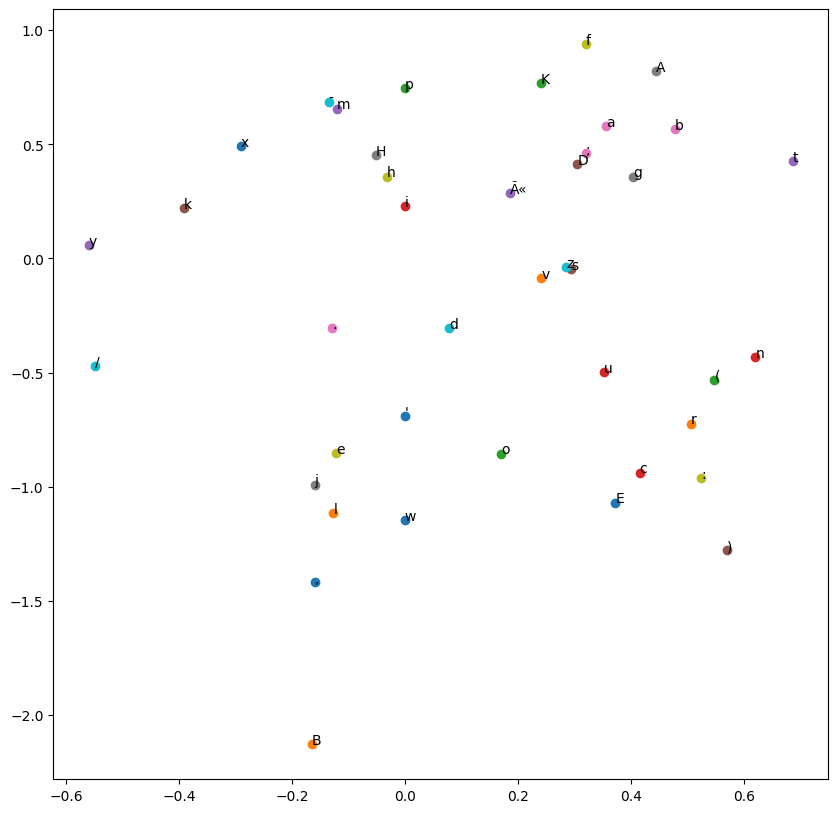

In [37]:
#MLPClassifier trainen
hidden_size = 50 # aantal neuronen in verborgen laag moet nog met user input gedaan worden
mlp = MLPClassifier(hidden_layer_sizes=(hidden_size,), max_iter=500, learning_rate_init=0.01)
mlp.fit(X, Y) # train het model op de multi-hot input vectors X en labels Y

#Embeddings van input naar hidden layer
embeddings = mlp.coefs_[0].T  # coefs_[0] zijn de gewichten van input naar hidden laag
# Transponeren zodat embeddings shape = (num_tokens, hidden_size) wordt
# Elke rij is de embedding vector van een token

#Alle token embeddings printen
for tok, idx in token_to_idx.items():
    print(f"Embedding van '{tok}': {embeddings[idx]}")

# plotten eerste 2 dimensies
if hidden_size >= 2:
    plt.figure(figsize=(10,10))
    for tok, idx in token_to_idx.items():
        coord = embeddings[idx][:2]
        plt.scatter(coord[0], coord[1])
        plt.annotate(tok, (coord[0], coord[1]))
    plt.show()